# Regression with PowerPlant Dataset - Tensorflow

- [link to dataset](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import tensorflow as tf

In [3]:
data= pd.read_excel("../DATA/Folds5x2_pp.xlsx")
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
x= data.iloc[:, :-1]
y= data.iloc[:,-1]
x.shape, y.shape

((9568, 4), (9568,))

<Figure size 576x432 with 0 Axes>

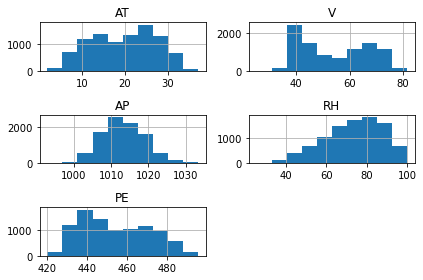

In [8]:
plt.figure(figsize=(8,6))
data.hist()
plt.tight_layout()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [52]:
# Creating model 1
ann = tf.keras.models.Sequential(name="model1")
ann.add(tf.keras.Input((4,),dtype="float32"))
ann.add(tf.keras.layers.Dense(units=6, activation='relu',))
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

ann.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,), loss = 'mean_squared_error')

In [53]:
hist1=ann.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split=0.23, callbacks=[early_stop])

Epoch 1/100
162/162 [==============================] - 0s 3ms/step - loss: 1121.4135 - val_loss: 178.4719
Epoch 2/100
162/162 [==============================] - 0s 2ms/step - loss: 169.6126 - val_loss: 130.5594
Epoch 3/100
162/162 [==============================] - 0s 2ms/step - loss: 96.4478 - val_loss: 74.6939
Epoch 4/100
162/162 [==============================] - 0s 2ms/step - loss: 65.2291 - val_loss: 63.0828
Epoch 5/100
162/162 [==============================] - 0s 2ms/step - loss: 55.1857 - val_loss: 52.9065
Epoch 6/100
162/162 [==============================] - 0s 2ms/step - loss: 50.3074 - val_loss: 49.9321
Epoch 7/100
162/162 [==============================] - 0s 2ms/step - loss: 47.0416 - val_loss: 45.9979
Epoch 8/100
162/162 [==============================] - 0s 2ms/step - loss: 44.5165 - val_loss: 45.2395
Epoch 9/100
162/162 [==============================] - 0s 3ms/step - loss: 42.4081 - val_loss: 41.8217
Epoch 10/100
162/162 [==============================] - 0s 2ms/step 

<AxesSubplot:>

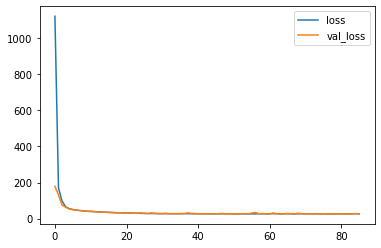

In [54]:
losses = pd.DataFrame(hist1.history)

losses[['loss','val_loss']].plot()

In [55]:
preds= ann.predict(X_test)

In [56]:
ann.evaluate(X_test, y_test)

90/90 [==============================] - 0s 2ms/step - loss: 25.0735


25.07354736328125

In [59]:
from sklearn.metrics import mean_squared_error as mse, r2_score
r2_score(y_test, preds), mse(y_test, preds)

(0.9144713503237847, 25.073548410311627)

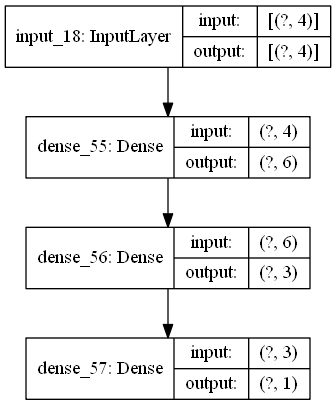

In [60]:
tf.keras.utils.plot_model(ann, show_shapes=True, show_layer_names=True)

# Thanks